In [1]:
# Kullanılacak paketlerin çağrılması
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pandas Tanımı
Pandas Excel görevi yapan bir kütüphanedir. DataFrame'ler ile çalışır. Series(Seriler) nesnesi ile çalışır.

In [2]:
pd.Series([1,6,8])

0    1
1    6
2    8
dtype: int64

# Pandas İşlemleri

In [3]:
df = pd.DataFrame([1,2,6,7],columns=['a'])

In [5]:
df = pd.read_csv("employees.csv")

In [6]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [7]:
# None: Olmayan Veri

degerler1 = np.array([1,2,None,5,2])

In [10]:
degerler1.sum()

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

In [12]:
# NaN: Not a Number
degerler2 = np.array([1, np.nan, 2,5])

In [13]:
type(degerler2[1])

numpy.float64

In [14]:
degerler2.sum()

nan

In [15]:
np.nan + 1

nan

In [17]:
np.nansum(degerler2), np.nanmin(degerler2), np.nanmax(degerler2)

(8.0, 1.0, 5.0)

In [20]:
degerler2 = pd.Series([1,np.nan,2,5])

## Pandas ile Eksik Değerlerin Çözümü

1. `ìsnull()`: Eksik değerler için True değerini dönderir.
2. `notnull()`: Eksik olmayan değerler için `True`değerini dönderir.
3. `dropna()`: Eksik değerleri düşürür.
4. `fillna()`: Eksik değerleri doldurur.

In [31]:
degerler2.isnull()

0    False
1     True
2    False
3    False
dtype: bool

In [36]:
degerler2[degerler2.notnull()]

8.0

In [37]:
degerler2.dropna(inplace=True)

In [38]:
degerler2

0    1.0
2    2.0
3    5.0
dtype: float64

In [39]:
df =pd.DataFrame([[1,np.nan,2],[2,3,5],[np.nan,4,6]])

In [40]:
df

,0,1,2
0,1.0,NaN,2
1,2.0,3.0,5
2,NaN,4.0,6


In [50]:
df.dropna(axis='rows',thresh = 3)

,0,1,2
1,2.0,3.0,5


## Groupby

In [51]:
df = pd.read_csv("employees.csv")

In [55]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [63]:
df.groupby('Senior Management').mean()['Salary']

Senior Management
False    89638.264516
True     90935.158120
Name: Salary, dtype: float64

## Çapraz Tablolar

In [64]:
dogumlar = pd.read_csv("births.csv")

In [65]:
dogumlar.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [71]:
dogumlar.pivot_table('births',index='gender',columns=['month'])

month,1,2,3,4,5,6,7,8,9,10,11,12
gender,,,,,,,,,,,,
F,9242.644717,9057.980707,9437.577099,9130.767442,9396.308869,9475.934681,9957.643731,10092.848624,10035.703876,9709.430982,9234.710078,9455.892966
M,9691.807044,9558.436893,9919.436641,9651.940810,9953.588326,9965.959690,10482.044343,10576.006107,10544.015552,10098.172256,9676.866667,9897.188073


In [69]:
dogumlar.shape

(15547, 5)

In [75]:
dogumlar['onyil'] = 10*(dogumlar['year']//10)

In [81]:
dogumlar

,year,month,day,gender,births,onyil
0,1969,1,1.0,F,4046,1960
1,1969,1,1.0,M,4440,1960
2,1969,1,2.0,F,4454,1960
3,1969,1,2.0,M,4548,1960
4,1969,1,3.0,F,4548,1960
...,...,...,...,...,...,...
15542,2008,10,NaN,M,183219,2000
15543,2008,11,NaN,F,158939,2000
15544,2008,11,NaN,M,165468,2000
15545,2008,12,NaN,F,173215,2000


In [83]:
dogumlar.pivot_table('births', index='onyil', columns='gender',aggfunc='mean')

gender,F,M
onyil,,
1960,4566.755208,4808.781250
1970,4267.403569,4497.386393
1980,5460.886072,5740.886635
1990,162328.783333,170171.275000
2000,168789.898148,176911.370370


# Veri Görselleştirme matplotlib

In [84]:
veriler = pd.read_csv("heart_disease.csv")

In [85]:
veriler.head()

,site,age,is_male,chest_pain,rest_blood_press,cholesterol,high_blood_sugar,rest_ecg,max_heart_rate,exer_angina,ST_depression,Peak_ST_seg,major_vessels,thal,has_heart_disease
0,cleve,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,cleve,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,cleve,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,cleve,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,cleve,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [86]:
veriler.shape

(920, 15)

In [87]:
veriler['max_heart_rate'].unique()

array(['150', '108', '129', '187', '172', '178', '160', '163', '147',
       '155', '148', '153', '142', '173', '162', '174', '168', '139',
       '171', '144', '132', '158', '114', '151', '161', '179', '120',
       '112', '137', '157', '169', '165', '123', '128', '152', '140',
       '188', '109', '125', '131', '170', '113', '99', '177', '141',
       '180', '111', '143', '182', '156', '115', '149', '145', '146',
       '175', '186', '185', '159', '130', '190', '136', '97', '127',
       '154', '133', '126', '202', '103', '166', '164', '184', '124',
       '122', '96', '138', '88', '105', '194', '195', '106', '167', '95',
       '192', '117', '121', '116', '71', '118', '181', '134', '90', '176',
       '110', '92', '104', '60', '82', '135', '83', '98', '100', '94',
       '119', '63', '70', '77', '72', '78', '86', '93', '67', '?', '84',
       '80', '107', '102', '69', '73', '87', '91'], dtype=object)

In [88]:
veriler['max_heart_rate'].replace(to_replace='?',value=0,inplace=True)

In [89]:
veriler['max_heart_rate'].unique()

array(['150', '108', '129', '187', '172', '178', '160', '163', '147',
       '155', '148', '153', '142', '173', '162', '174', '168', '139',
       '171', '144', '132', '158', '114', '151', '161', '179', '120',
       '112', '137', '157', '169', '165', '123', '128', '152', '140',
       '188', '109', '125', '131', '170', '113', '99', '177', '141',
       '180', '111', '143', '182', '156', '115', '149', '145', '146',
       '175', '186', '185', '159', '130', '190', '136', '97', '127',
       '154', '133', '126', '202', '103', '166', '164', '184', '124',
       '122', '96', '138', '88', '105', '194', '195', '106', '167', '95',
       '192', '117', '121', '116', '71', '118', '181', '134', '90', '176',
       '110', '92', '104', '60', '82', '135', '83', '98', '100', '94',
       '119', '63', '70', '77', '72', '78', '86', '93', '67', 0, '84',
       '80', '107', '102', '69', '73', '87', '91'], dtype=object)

In [91]:
veriler['max_heart_rate'].describe()

count     920
unique    120
top         0
freq       55
Name: max_heart_rate, dtype: int64

In [93]:
veriler['max_heart_rate'] = veriler['max_heart_rate'].astype(np.int64)

In [94]:
veriler['max_heart_rate'].unique()

array([150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 142,
       173, 162, 174, 168, 139, 171, 144, 132, 158, 114, 151, 161, 179,
       120, 112, 137, 157, 169, 165, 123, 128, 152, 140, 188, 109, 125,
       131, 170, 113,  99, 177, 141, 180, 111, 143, 182, 156, 115, 149,
       145, 146, 175, 186, 185, 159, 130, 190, 136,  97, 127, 154, 133,
       126, 202, 103, 166, 164, 184, 124, 122,  96, 138,  88, 105, 194,
       195, 106, 167,  95, 192, 117, 121, 116,  71, 118, 181, 134,  90,
       176, 110,  92, 104,  60,  82, 135,  83,  98, 100,  94, 119,  63,
        70,  77,  72,  78,  86,  93,  67,   0,  84,  80, 107, 102,  69,
        73,  87,  91], dtype=int64)

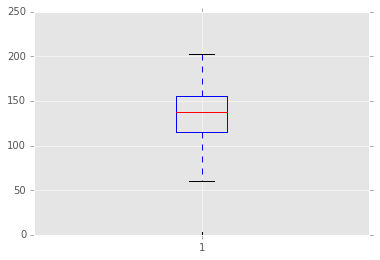

In [110]:
plt.boxplot(x=veriler["max_heart_rate"]);

In [115]:
plt.style.use('seaborn-deep')

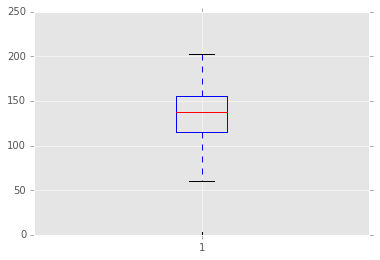

In [116]:
plt.boxplot(x=veriler["max_heart_rate"]);

In [117]:
%matplotlib inline

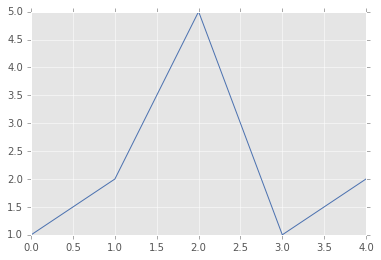

In [118]:
plt.plot([1,2,5,1,2]);

Text(0.5, 1.0, 'Max Heart Rate')

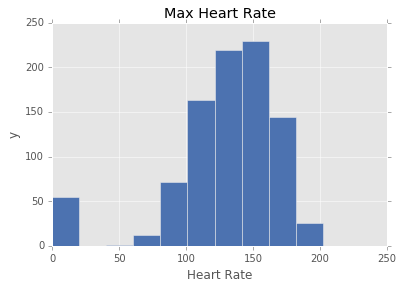

In [120]:
plt.hist(veriler["max_heart_rate"])
plt.xlabel("Heart Rate")
plt.ylabel("y")
plt.title("Max Heart Rate")

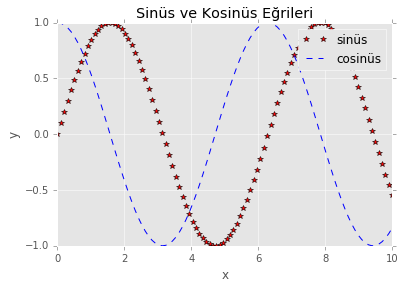

In [126]:
x = np.linspace(0,10,100)
fig = plt.figure()
plt.plot(x, np.sin(x),"*", label = "sinüs",color="red")
plt.plot(x, np.cos(x),"--", label = "cosinüs", color="blue")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sinüs ve Kosinüs Eğrileri")
plt.legend()

In [127]:
fig.savefig("figur.png")

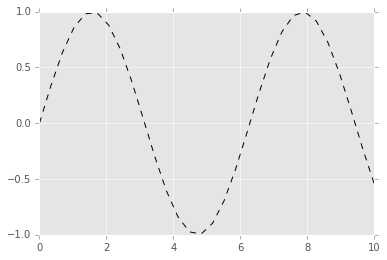

In [131]:
x=np.linspace(0,10,30)
y=np.sin(x)
plt.plot(x,y,"--",color="black")

(array([  2.,  15.,  58., 135., 227., 258., 182.,  83.,  30.,  10.]),
 array([-3.31833566, -2.68402552, -2.04971537, -1.41540523, -0.78109508,
        -0.14678494,  0.48752521,  1.12183535,  1.7561455 ,  2.39045564,
         3.02476579]),
 <a list of 10 Patch objects>)

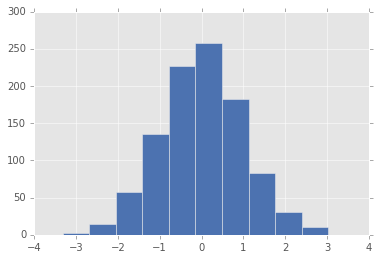

In [133]:
plt.hist(np.random.randn(1000))

## Çoklu Alt Grafikler

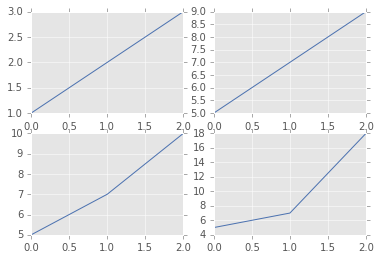

In [137]:
plt.subplot(2,2,1)
plt.plot([1,2,3])
plt.subplot(2,2,2)
plt.plot([5,7,9])
plt.subplot(2,2,3)
plt.plot([5,7,10])
plt.subplot(2,2,4)
plt.plot([5,7,18])

<BarContainer object of 10 artists>

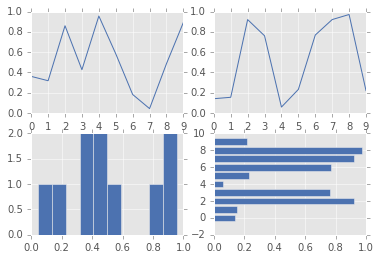

In [140]:
x = np.arange(10)
y1 = np.random.rand(10)
y2 = np.random.rand(10)
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(x,y1)
ax2 = fig.add_subplot(222)
ax2.plot(x,y2)
ax3 = fig.add_subplot(223)
ax3.hist(y1)
ax4 = fig.add_subplot(224)
ax4.barh(x,y2)

In [138]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [139]:
np.random.rand(10)

array([0.97983405, 0.53911533, 0.08639538, 0.30507209, 0.49681037,
       0.28661585, 0.13952092, 0.63877269, 0.10634068, 0.35691938])